# Simulating an Example Village with RAMP

RAMP is an open-source software designed for the generation of **high-resolution multi-energy profiles** where only rudimentary information on user behaviour is available, allowing for the **characterization of users**, **appliances** and the definition of **operating windows**, to yield a finely detailed energy usage profile on a **minute basis**.

<div style="text-align: center;">
  <img src="Images/RAMP_intro.png" alt="Examples of load curve demands estimated using RAMP software" style="width:80%;"/>
</div>

In the upcoming sections, the application of RAMP will be demonstrated step by step through the simulation of a community consisting of 150 households, categorized into three main income groups: high-income, middle-income, and low-income households. The simulation will also encompass a rural school, a hospital, and public lighting. Each category will be characterized by its distinct appliance specifications. This example refers to a real case study that is the electrical load of the off-grid El Espino village (Bolivia), which also validated the software engine.

## 1) User Class Definition

The first step in creating a detailed load curve with RAMP is to clearly define user classes. Each user class represents a group with specific energy usage habits, such as households, commercials, schools, health facilities etc. Defining different user classes allows us to accurately mirror real-life energy consumption in our simulations. The process of characterizing user classes involves two main parameters:

- **User Name:** An optional but helpful feature that labels the user class, providing us with a clear identifier for the category.
- **Number of Users:** This specifies how many users fall into this category within the community.

Below is the Python code that defines a basic structure for user classes and illustrates how to instantiate a user class with specific characteristics.

```python
# Define a User Type (UT)
UT = User(
    user_name= "User Class name", 
    num_users= 25 # Replace with the actual number of users for the defined class
)

<div style="background-color: #e7f4e4; border-left: 6px solid #5cb85c; padding: 10px; margin: 10px 0; font-size: 16px;">
    <strong>Note:</strong> The code cells below are configured to simulate the example village as described. These are meant to be pre-compiled examples provided for demonstration and users are encouraged to edit and adapt these configurations to align with your specific case studies.
</div>

### Initialization

Let's now proceed to initialize several specific user classes representing different segments of a village community. This includes various income levels of households, a hospital, a school, and public lighting facilities.

In [102]:
# Importing functions
from ramp import UseCase, User

In [103]:
# Initialize an empty list to store user instances
users = []

# Create the high-income user class
HI = User(user_name = "High-Income Household", num_users = 25)
users.append(HI)  # Save the instance for later use

# Create the middle-income user class
MI = User(user_name = "Middle-Income Household", num_users = 75)
users.append(MI)  # Save the instance for later use

# Create the low-income user class
LI = User(user_name = "Low-Income Household", num_users = 50)
users.append(LI)  # Save the instance for later use

# Create the hospital user class
Hospital = User(user_name="Hospital", num_users=1)
users.append(Hospital)  # Save the instance for later use

# Create the school user class
School = User(user_name="School", num_users=1)
users.append(School)  # Save the instance for later use

# Create the public lightning user class
Public_lighting = User(user_name="Public Lighting", num_users=1)
users.append(Public_lighting)  # Save the instance for later use


## 2) Appliance Characterization

Following the initial step of defining user classes, the next phase in our RAMP simulation involves the characterization of appliances for each class.
Appliance characterization in RAMP entails defining several key attributes for each appliance utilized by the user class, describing the operational aspects and usage patterns.

The attributes that can be initialized during appliance characterization include:

- **User**: Associates the appliance with a specific user class in the RAMP model.
- **Number**: Indicates how many units of the appliance are present, defaulting to 1 if not specified.
- **Power**: Represents the energy consumption rate of the appliance, either as a constant value or a variable series across days (e.g., average in Watts). Default is 0.
- **Number of Windows**: Specifies the count of distinct time windows within which the appliance operates, default is 1.
- **Functional Time**: Total operational time of the appliance per day, measured in minutes from 0 to 1440, default is 0.
- **Time Fraction Random Variability**: Percentage of the total operational time that exhibits random variability, default is 0%.
- **Functional Cycle**: Minimum continuous operating time once the appliance is turned on, measured in minutes, default is 1 minute.
- **Fixed**: Indicates if all units of the appliance always switch on simultaneously ('yes') or independently ('no'), default is "no".
- **Fixed Cycle**: Defines the number of operational cycles, where 0 indicates continuous operation. Non-zero values require specifying cycle windows (up to 3), default is 0.
- **Occasional Use**: Percentage indicating how frequently the appliance is used, with 1.0 meaning daily use and lower values reflecting less frequent use, default is 1.
- **Flat**: Whether the appliance is subject to any random variability ('no') or not ('yes'), applicable to devices like public lighting, default is "no".
- **Thermal Power Variability**: Percentage variability in power usage due to factors like temperature changes, default is 0%.
- **Preference Index**: A numerical index used to associate the appliance with user's daily preference patterns, must be equal to or less than the max value specified in user preferences, default is 0.
- **Weekday/Weekend Type**: Specifies appliance use as weekdays (0), weekends (1), or both (2), default is 2.

Below is the Python code that defines a basic structure for an appliance characterization:

```python
# Define an appliance for User Type (UT)
UT_appliance = UT.Appliance(
    number=1,
    power=0,
    num_windows=1,
    func_time=0,
    time_fraction_random_variability=0,
    func_cycle=1,
    fixed="no",
    fixed_cycle=0,
    occasional_use=1,
    flat="no",
    thermal_P_var=0,
    pref_index=0,
    wd_we_type=2,
    name="",
)

### Understanding Time Windows

**Functioning time windows** represent specific periods during the day when an appliance is typically used. Each appliance may have one or more time windows associated with it, indicating when it is *randomly turned on and off*. For initializing time windows, we use the `.windows()` method associated with each appliance object. This method accepts **pairs of start and end times**, expressed in minutes from midnight. For example, a time window from 8 AM to 9 AM is represented as `[480, 540]`, since 8 AM is 480 minutes after midnight, and 9 AM is 540 minutes after midnight. In addition, users can specify also advanced settings such as percentage of variability and daily usage profiles as reported below:

```python
# Parameters related to functioning windows
window_1 = w1 #array of start and ending time for window of use #1
window_2 = w2 #array of start and ending time for window of use #2
window_3 = w3 #array of start and ending time for window of use #3
random_var_w = r_w #percentage of variability in the start and ending times of the windows
daily_use = np.zeros(1440) #create an empty daily use profile
daily_use[w1[0]:(w1[1])] = np.full(np.diff(w1),0.001) #fills the daily use profile with infinitesimal values that are just used to identify the functioning windows
daily_use[w2[0]:(w2[1])] = np.full(np.diff(w2),0.001) #same as above for window2
daily_use[w3[0]:(w3[1])] = np.full(np.diff(w3),0.001) #same as above for window3
daily_use_masked = np.zeros_like(ma.masked_not_equal(self.daily_use,0.001)) #apply a python mask to the daily_use array to make only functioning windows 'visibile'
random_var_1 = int(r_w*np.diff(w1)) #calculate the random variability of window1, i.e. the maximum range of time they can be enlarged or shortened
random_var_2 = int(r_w*np.diff(w2)) #same as above
random_var_3 = int(r_w*np.diff(w3)) #same as above

```

Beyond time windows, accurately modelling the operation of some particular appliances such as freezers requires understanding their specific **duty cycles**. A duty cycle represents the sequence of operation states an appliance goes through within its operational period. This concept is especially relevant for appliances that don't simply turn on and off but instead operate in a *more complex manner*, cycling through different power consumption levels. For defining specific duty cycles, we employ methods such as .specific_cycle_1(), .specific_cycle_2(), and .specific_cycle_3() within the appliance's class. These methods allow for a detailed representation of how an appliance operates over time, including variations in power usage. Here below all the parameters involved:

```python
# Defining a specific duty cycle for an appliance
P_11 = 200 # Power level during the first segment of the duty cycle
t_11 = 20  # Duration of the first segment in minutes
P_12 = 150 # Power level during the second segment of the duty cycle
t_12 = 10  # Duration of the second segment in minutes
r_c1 = 5   # Percentage of variability in the duration of duty cycle segments

```

Below is the Python code that defines a basic structure for a functioning windows associated to a specific appliance:

```python
# Define the functioning windows for an appliance of user type (UT)
UT_appliance.windows(
    window_1 = [0, 0], # Replace with the actual values (in minutes)
    window_2 =[0, 0]   # Replace with the actual values (in minutes)
    random_var_w = 0   # Replace with the desired percentage of variability in the start and end times of the windows
)

```

### Initialization

Let's now proceed to initialize several specific appliances for each user class.

**High-Income Households**

In [104]:
# Indoor bulb
HI_indoor_bulb = HI.Appliance(
    number = 6,        
    power = 7,         
    num_windows = 2,    
    func_time = 120,    
    time_fraction_random_variability = 0.1,  
    func_cycle = 5,                           
    fixed = "no",
    fixed_cycle = 0,
    occasional_use = 1,
    flat = "no",
    thermal_P_var = 0,
    pref_index = 0,
    wd_we_type = 2,
)

HI_indoor_bulb.windows(
    window_1 =[1170, 1440], # 7:30 PM - 24:00 PM
    window_2 =[0, 30]       # 12:00 AM - 12:30 AM
)

# Television
HI_TV = HI.Appliance(2, 60, 3, 180, 0.1, 5)
HI_TV.windows([720, 900], [1170, 1440], 0.35, [0, 60])

# DVD
HI_DVD = HI.Appliance(1, 8, 3, 60, 0.1, 5)
HI_DVD.windows([720, 900], [1170, 1440], 0.35, [0, 60])

# Antenna
HI_Antenna = HI.Appliance(1, 8, 3, 120, 0.1, 5)
HI_Antenna.windows([720, 900], [1170, 1440], 0.35, [0, 60])

# Phone charger
HI_Phone_charger = HI.Appliance(5, 2, 2, 300, 0.2, 5)
HI_Phone_charger.windows([1110, 1440], [0, 30], 0.35)

# Freezer
HI_Freezer = HI.Appliance(1, 200, 1, 1440, 0, 30, "yes", 3)
HI_Freezer.windows([0, 1440], [0, 0])
HI_Freezer.specific_cycle_1(200, 20, 5, 10)
HI_Freezer.specific_cycle_2(200, 15, 5, 15)
HI_Freezer.specific_cycle_3(200, 10, 5, 20)
HI_Freezer.cycle_behaviour(
    [480, 1200], [0, 0], [300, 479], [0, 0], [0, 299], [1201, 1440]
)

# Mixer
HI_Mixer = HI.Appliance(1, 50, 3, 30, 0.1, 1, occasional_use=0.33)
HI_Mixer.windows([420, 480], [660, 750], 0.35, [1140, 1200])


**Middle-Income Households**

In [105]:
# Indoor bulb
MI_indoor_bulb = MI.Appliance(3, 7, 2, 120, 0.2, 10)
MI_indoor_bulb.windows([1170, 1440], [0, 30], 0.35)

# Outdoor bulb
MI_outdoor_bulb = MI.Appliance(2, 13, 2, 600, 0.2, 10)
MI_outdoor_bulb.windows([0, 330], [1170, 1440], 0.35)

# Television
MI_TV = MI.Appliance(1, 60, 3, 90, 0.1, 5)
MI_TV.windows([450, 660], [720, 840], 0.35, [1170, 1440])

# DVD
MI_DVD = MI.Appliance(1, 8, 3, 30, 0.1, 5)
MI_DVD.windows([450, 660], [720, 840], 0.35, [1170, 1440])

# Antenna
MI_Antenna = MI.Appliance(1, 8, 3, 60, 0.1, 5)
MI_Antenna.windows([450, 660], [720, 840], 0.35, [1170, 1440])

# Phone charger
MI_Phone_charger = MI.Appliance(4, 2, 1, 300, 0.2, 5)
MI_Phone_charger.windows([1020, 1440], [0, 0], 0.35)

# Mixer
MI_Mixer = MI.Appliance(1, 50, 2, 30, 0.1, 1, occasional_use=0.33)
MI_Mixer.windows([660, 750], [1110, 1200], 0.35)

**Low-Income Households**

In [106]:
# Indoor bulb
LI_indoor_bulb = LI.Appliance(2, 7, 2, 120, 0.2, 10)
LI_indoor_bulb.windows([1170, 1440], [0, 30], 0.35)

# Outdoor bulb
LI_outdoor_bulb = LI.Appliance(1, 13, 2, 600, 0.2, 10)
LI_outdoor_bulb.windows([0, 330], [1170, 1440], 0.35)

# Television
LI_TV = LI.Appliance(1, 60, 3, 90, 0.1, 5)
LI_TV.windows([750, 840], [1170, 1440], 0.35, [0, 30])

# DVD
LI_DVD = LI.Appliance(1, 8, 3, 30, 0.1, 5)
LI_DVD.windows([750, 840], [1170, 1440], 0.35, [0, 30])

# Antenna
LI_Antenna = LI.Appliance(1, 8, 3, 60, 0.1, 5)
LI_Antenna.windows([750, 840], [1170, 1440], 0.35, [0, 30])

# Phone charger
LI_Phone_charger = LI.Appliance(2, 2, 1, 300, 0.2, 5)
LI_Phone_charger.windows([1080, 1440], [0, 0], 0.35)

**Public Lighting**

In [107]:
# Public lighting type 1
Pub_lights = Public_lighting.Appliance(12, 40, 2, 310, 0.1, 300, "yes", flat="yes")
Pub_lights.windows([0, 336], [1110, 1440], 0.2)

# Public lighting type 2
Pub_lights_2 = Public_lighting.Appliance(25, 150, 2, 310, 0.1, 300, "yes", flat="yes")
Pub_lights_2.windows([0, 336], [1110, 1440], 0.2)

**Rural School**

In [108]:
# Indoor bulb
S_indoor_bulb = School.Appliance(8, 7, 1, 60, 0.2, 10)
S_indoor_bulb.windows([1020, 1080], [0, 0], 0.35)

# Outdoor bulb
S_outdoor_bulb = School.Appliance(6, 13, 1, 60, 0.2, 10)
S_outdoor_bulb.windows([1020, 1080], [0, 0], 0.35)

# Phone charger
S_Phone_charger = School.Appliance(5, 2, 2, 180, 0.2, 5)
S_Phone_charger.windows([510, 750], [810, 1080], 0.35)

# Laptop
S_PC = School.Appliance(18, 50, 2, 210, 0.1, 10)
S_PC.windows([510, 750], [810, 1080], 0.35)

# Printer
S_Printer = School.Appliance(1, 20, 2, 30, 0.1, 5)
S_Printer.windows([510, 750], [810, 1080], 0.35)

# Freezer
S_Freezer = School.Appliance(1, 200, 1, 1440, 0, 30, "yes", 3)
S_Freezer.windows([0, 1440])
S_Freezer.specific_cycle_1(200, 20, 5, 10)
S_Freezer.specific_cycle_2(200, 15, 5, 15)
S_Freezer.specific_cycle_3(200, 10, 5, 20)
S_Freezer.cycle_behaviour(
    [580, 1200], [0, 0], [510, 579], [0, 0], [0, 509], [1201, 1440]
)

# Television
S_TV = School.Appliance(1, 60, 2, 120, 0.1, 5, occasional_use=0.5)
S_TV.windows([510, 750], [810, 1080], 0.35)

# DVD
S_DVD = School.Appliance(1, 8, 2, 120, 0.1, 5, occasional_use=0.5)
S_DVD.windows([510, 750], [810, 1080], 0.35)

# Stereo
S_Stereo = School.Appliance(1, 150, 2, 90, 0.1, 5, occasional_use=0.33)
S_Stereo.windows([510, 750], [810, 1080], 0.35)

**Rural Hospital**

In [109]:
# Indoor bulb
Ho_indoor_bulb = Hospital.Appliance(12, 7, 2, 690, 0.2, 10)
Ho_indoor_bulb.windows([480, 720], [870, 1440], 0.35)

# Outdoor bulb
Ho_outdoor_bulb = Hospital.Appliance(1, 13, 2, 690, 0.2, 10)
Ho_outdoor_bulb.windows([0, 330], [1050, 1440], 0.35)

# Phone charger
Ho_Phone_charger = Hospital.Appliance(8, 2, 2, 300, 0.2, 5)
Ho_Phone_charger.windows([480, 720], [900, 1440], 0.35)

# Fridge type 1
Ho_Fridge = Hospital.Appliance(1, 150, 1, 1440, 0, 30, "yes", 3)
Ho_Fridge.windows([0, 1440], [0, 0])
Ho_Fridge.specific_cycle_1(150, 20, 5, 10)
Ho_Fridge.specific_cycle_2(150, 15, 5, 15)
Ho_Fridge.specific_cycle_3(150, 10, 5, 20)
Ho_Fridge.cycle_behaviour(
    [580, 1200], [0, 0], [420, 579], [0, 0], [0, 419], [1201, 1440]
)

# Fridge type 2
Ho_Fridge2 = Hospital.Appliance(1, 150, 1, 1440, 0, 30, "yes", 3)
Ho_Fridge2.windows([0, 1440], [0, 0])
Ho_Fridge2.specific_cycle_1(150, 20, 5, 10)
Ho_Fridge2.specific_cycle_2(150, 15, 5, 15)
Ho_Fridge2.specific_cycle_3(150, 10, 5, 20)
Ho_Fridge2.cycle_behaviour(
    [580, 1200], [0, 0], [420, 579], [0, 0], [0, 299], [1201, 1440]
)

# Laptop
Ho_PC = Hospital.Appliance(2, 50, 2, 300, 0.1, 10)
Ho_PC.windows([480, 720], [1050, 1440], 0.35)

# Mixer
Ho_Mixer = Hospital.Appliance(1, 50, 2, 60, 0.1, 1, occasional_use=0.33)
Ho_Mixer.windows([480, 720], [1050, 1440], 0.35)

<div style="background-color: #ffffcc; border-left: 6px solid #ffeb3b; padding: 10px; margin: 10px 0; font-size: 16px;">
    <strong>Note:</strong> Uncomment the following code block, edit and run it to define a new user with its own specific appliances and functioning windows.
</div>

In [110]:
'''
# Define a New User
New_User = User(
    user_name= "User Class name", 
    num_users= 25 # Replace with the actual number of users for the defined class
)

# Define an appliance for New User
New_User_appliance = New_User.Appliance(
    number=1,
    power=0,
    num_windows=1,
    func_time=0,
    time_fraction_random_variability=0,
    func_cycle=1,
    fixed="no",
    fixed_cycle=0,
    occasional_use=1,
    flat="no",
    thermal_P_var=0,
    pref_index=0,
    wd_we_type=2,
    name="",
)
# Define the functioning windows for the appliance of New User
New_User_appliance.windows(
    window_1 = [0, 0], # Replace with the actual values (in minutes)
    window_2 =[0, 0]   # Replace with the actual values (in minutes)
    random_var_w = 0   # Replace with the desired percentage of variability in the start and end times of the windows
)
'''

'\n# Define a New User\nNew_User = User(\n    user_name= "User Class name", \n    num_users= 25 # Replace with the actual number of users for the defined class\n)\n\n# Define an appliance for New User\nNew_User_appliance = New_User.Appliance(\n    number=1,\n    power=0,\n    num_windows=1,\n    func_time=0,\n    time_fraction_random_variability=0,\n    func_cycle=1,\n    fixed="no",\n    fixed_cycle=0,\n    occasional_use=1,\n    flat="no",\n    thermal_P_var=0,\n    pref_index=0,\n    wd_we_type=2,\n    name="",\n)\n# Define the functioning windows for the appliance of New User\nNew_User_appliance.windows(\n    window_1 = [0, 0], # Replace with the actual values (in minutes)\n    window_2 =[0, 0]   # Replace with the actual values (in minutes)\n    random_var_w = 0   # Replace with the desired percentage of variability in the start and end times of the windows\n)\n'

## 3) Run the simulation
This phase consolidates the defined user classes and their corresponding appliances into a comprehensive "use case." The upcoming interactive section allows for the initialization of this scenario with user-defined parameters. By selecting specific start and end dates, and choosing which user classes to include, you can tailor the simulation to fit your needs. 

<div style="background-color: #FFCCCC; border-left: 6px solid #FF0000; padding: 10px; margin-bottom: 20px;">
    <strong>Warning:</strong> The code block below is essential as it defines critical functions for pre-processing and initializing the use case. Please do <strong>NOT</strong> modify this code  unless you are familiar with its structure and dependencies. Interact with the subsequent widgets to customize your input parameters and trigger simulations.
</div>

In [99]:
# Install ipywidgets if not already installed (uncomment the next line if needed)
# !pip install ipywidgets

import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Introduction to the Date Selection
print("Please select the start and end dates for the simulation period:\n")
start_date_picker = widgets.DatePicker(description='Start Date', disabled=False)
end_date_picker = widgets.DatePicker(description='End Date', disabled=False)
display(start_date_picker, end_date_picker)

# Introduction to User Selection
print("\nSelect the user classes to include in the simulation:\n")
user_checkboxes = {user.user_name: widgets.Checkbox(value=True, description=user.user_name) for user in users}
checkboxes = widgets.VBox([user_checkboxes[user.user_name] for user in users])
display(checkboxes)

# Introduction to the Generate Profiles Button
print("\nPress the 'Generate Profiles' button to run the simulation:\n")
button = widgets.Button(description="Generate Profiles")
output = widgets.Output()

load_profile = None  # Global variable to store the load profile data

def generate_profiles(b):
    global load_profile  # Declare to modify the global variable
    with output:
        output.clear_output()
        start_date = start_date_picker.value.strftime('%Y-%m-%d') if start_date_picker.value else None
        end_date = end_date_picker.value.strftime('%Y-%m-%d') if end_date_picker.value else None

        if not start_date or not end_date:
            print("Please select both start and end dates.")
            return
        if pd.to_datetime(start_date) > pd.to_datetime(end_date):
            print("Start Date must be before End Date.")
            return

        selected_users = [user for user in users if user_checkboxes[user.user_name].value]
        if not selected_users:
            print("No users selected.")
            return

        try:
            use_case = UseCase(users=selected_users, date_start=start_date, date_end=end_date)
            load_profile = use_case.generate_daily_load_profiles()
            print("Load profile generation complete.")
        except Exception as e:
            print("An error occurred:", str(e))

button.on_click(generate_profiles)
display(button, output)

Please select the start and end dates for the simulation period:



DatePicker(value=None, description='Start Date', step=1)

DatePicker(value=None, description='End Date', step=1)


Select the user classes to include in the simulation:




Press the 'Generate Profiles' button to run the simulation:



Button(description='Generate Profiles', style=ButtonStyle())

Output()

## 4) Visualize the Results

### Pre-processing functions

<div style="background-color: #FFCCCC; border-left: 6px solid #FF0000; padding: 10px; margin-bottom: 20px;">
    <strong>Warning:</strong> The code block below is crucial for post-processing and visualizing the simulation results. It involves advanced data manipulations and plotting configurations that are essential for the accurate representation of data. Please do <strong>NOT</strong> modify this code unless you are familiar with its structure and dependencies. These functions are designed to format, analyze, and plot the profiles effectively, ensuring the integrity and readability of the output. Note that depending on the number of profiles simulated, processing time may vary and could taklup to  minutes to complete.
</div>

In [100]:
# Importing post-processing functions
from ramp.post_process.post_process import Profile_formatting
import numpy as np
import matplotlib.pyplot as plt

# Formatting the profile for plotting
Profiles_avg, Profiles_list_kW, Profiles_series = Profile_formatting(load_profile)

# Number of days in Profiles_series
minutes_per_day=1440
num_days = len(Profiles_series) // minutes_per_day

# Reshape Profiles_series into a 2D array: rows are days, columns are minutes of the day
Profiles_reshaped = Profiles_series.reshape((num_days, minutes_per_day))

# Calculate the average, min, and max daily profile
Profiles_daily_avg = Profiles_reshaped.mean(axis=0)

def plot_cloud_plot_with_avg(Profiles_series, Profiles_daily_avg):
    
    Profiles_min = Profiles_reshaped.min(axis=0)
    Profiles_max = Profiles_reshaped.max(axis=0)

    # Plotting
    plt.figure(figsize=(15, 10))

    # Plot the cloud of daily profiles
    for day in Profiles_reshaped:
        plt.plot(day / 1000, color='lightgrey', linewidth=0.5, alpha=0.3)  # Light cloud effect

    # Fill between the min and max values for each minute of the day to highlight variability
    plt.fill_between(range(minutes_per_day), Profiles_min / 1000, Profiles_max / 1000, color='grey', alpha=0.3, label='Variability Range')

    # Plot the average daily profile in red
    plt.plot(Profiles_daily_avg / 1000, color='red', linewidth=2, label='Average Daily Profile')

    plt.title('Daily Average Load Curve')
    plt.xlabel('Time of Day')
    plt.ylabel('Power [kW]')
    plt.xticks(np.linspace(0, minutes_per_day, 24), [f'{hour}:00' for hour in range(24)], rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('Results/daily_average_load_curve.png')
    plt.show()

def calculate_average_profile_metrics(Profiles_daily_avg, minutes_per_day=1440):

    # Convert power from Watts to kW for the entire average profile
    Profiles_daily_avg_kW = Profiles_daily_avg / 1000
    
    # Calculate total daily energy consumption in kWh from the average profile
    # by integrating (summing) over the day and dividing by 60 (to convert from minute to hour)
    daily_energy_kWh = Profiles_daily_avg_kW.sum() / 60
    
    # Find the peak power in kW from the average daily profile
    peak_power_kW = Profiles_daily_avg_kW.max()
    
    return daily_energy_kWh, peak_power_kW

### Generating results

Run the code snippet below to generate a plot displaying the cloud of daily load profiles along with the average daily load. This visualization provides insights into the variability and average consumption patterns of the simulated load demand. The plot would also be saved within Jupyter Notebooks/Results folder.

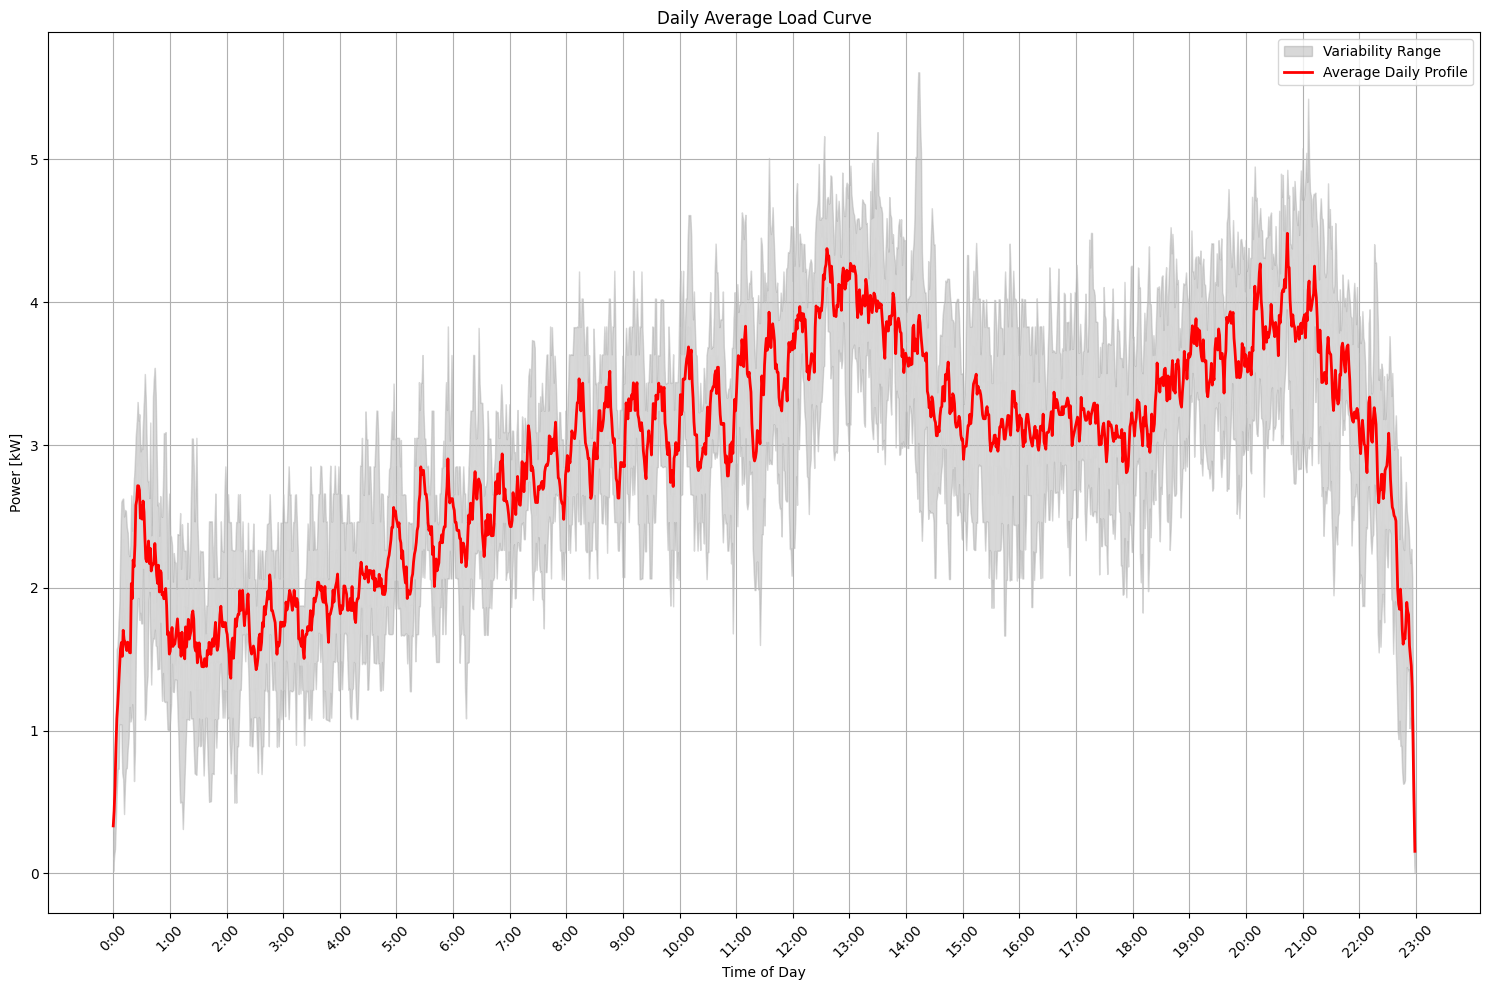

In [101]:
# Results plot
plot_cloud_plot_with_avg(Profiles_series,Profiles_daily_avg)

In [95]:
# Print the key energy ratings
daily_energy_kWh, peak_power_kW = calculate_average_profile_metrics(Profiles_daily_avg)
print(f"Daily Energy Consumption from Average Profile: {daily_energy_kWh:.2f} kWh")
print(f"Peak Power from Average Profile: {peak_power_kW:.2f} kW")

Daily Energy Consumption from Average Profile: 161.91 kWh
Peak Power from Average Profile: 14.47 kW


In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Number of days in Profiles_series
minutes_per_day=1440
num_days = len(Profiles_series) // minutes_per_day

# Create a slider for selecting the number of days to plot
day_slider = widgets.IntSlider(
    value=1, 
    min=1, 
    max=num_days, 
    step=1, 
    description='Days:',
    layout=widgets.Layout(width='800px')  # Ensuring the description is fully visible
)

# Create a button to trigger the plotting
plot_button = widgets.Button(description="Update the plot")

# Output widget to display the plot
output_plot = widgets.Output()

def plot_days(b=None):
    # Calculate how many days to plot based on the slider's value
    days_to_plot = day_slider.value
    indices_to_plot = days_to_plot * minutes_per_day

    # Plot the selected range
    with output_plot:
        clear_output(wait=True)
        plt.figure(figsize=(12, 6))
        plt.plot(load_profile[:indices_to_plot])
        plt.title(f'Load Profile for the first {days_to_plot} days')
        plt.xlabel('Time (minutes)')
        plt.ylabel('Load')
        plt.show()

# Bind the plot button to the plotting function
plot_button.on_click(plot_days)

# Display the widgets
display(day_slider, plot_button, output_plot)

# Initialize with a default plot
plot_days()

## 5) Exporting the Results

### Pre-Processing

<div style="background-color: #FFCCCC; border-left: 6px solid #FF0000; padding: 10px; margin-bottom: 20px;">
    <strong>Warning:</strong> The code block below handles the export of simulation results to Excel. It formats and saves the daily and concatenated load profiles for further analysis and reporting. Please do <strong>NOT</strong> modify this code unless you are familiar with its structure and dependencies. Incorrect modifications can disrupt the data integrity and reporting format.
</div>

In [96]:
import pandas as pd
def export_profiles_to_excel(Profiles_series, Profiles_daily_avg, file_name='Results/Load demand results.xlsx'):
    
    # Creating a pandas DataFrame for the average daily load profile
    avg_profile_df = pd.DataFrame(Profiles_daily_avg, columns=['Average Daily Load (kW)'])
    avg_profile_df.index.name = 'Minute of the Day'
    
    # Creating a pandas DataFrame for the concatenated profiles
    # Transpose the array to have minutes as rows and profiles (days) as columns
    concatenated_profiles_df = pd.DataFrame(Profiles_reshaped.T)
    concatenated_profiles_df.columns = [f'Profile {i+1}' for i in range(num_days)]
    concatenated_profiles_df.index.name = 'Minute'

    # Creating a Pandas Excel writer using openpyxl as the engine
    with pd.ExcelWriter(file_name, engine='openpyxl') as writer:
        # Writing each DataFrame to a specific sheet
        avg_profile_df.to_excel(writer, sheet_name='Average Daily Profile')
        concatenated_profiles_df.to_excel(writer, sheet_name='Concatenated Profiles')

### Saving in excel file

Execute the code snippet below to export the simulation results, including daily load profiles and average daily load, into an Excel file named 'Load demand results.xlsx', located in the 'Jupyter Notebooks/Results' folder.

In [81]:
# Export the results in the "results.xlsx" file into ramp/results folder
export_profiles_to_excel(Profiles_series,Profiles_daily_avg)